In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set()

# Problem Statement
The goal of this data science project is to help a real estate agency provide guidance to homeowners who want to buy or sell homes. One of the challenges that homeowners face is deciding whether to invest in home renovations and how much they can expect to gain from them. The project aims to address this challenge by developing a model that can estimate the value of a home based on its features and suggest the most profitable renovations for each home.

# Data Understanding
In this section of the data science project, we will explore and gain a comprehensive understanding of the dataset. Understanding the data is crucial before proceeding with any analysis or modeling tasks. Let's examine the columns and their descriptions to familiarize ourselves with the dataset:

1. id: Unique identifier for each house.

2. date: Date when the house was sold.

3. price: Sale price of the house (prediction target variable).

4. bedrooms: Number of bedrooms in the house.

5. bathrooms: Number of bathrooms in the house.

6. sqft_living: Square footage of living space in the home.

7. sqft_lot: Square footage of the lot.

8. floors: Number of floors (levels) in the house.

9. waterfront: Indicates whether the house is located on a waterfront. 

10. view: Quality of the view from the house.

11. condition: Overall condition of the house, related to the maintenance of the property. .

12. grade: Overall grade of the house, related to the construction and design of the property. 

13. sqft_above: Square footage of the house apart from the basement.

14. sqft_basement: Square footage of the basement in the house.

15. yr_built: Year when the house was built.

16. yr_renovated: Year when the house was last renovated.

17. zipcode: ZIP Code used by the United States Postal Service.

18. lat: Latitude coordinate of the house.

19. long: Longitude coordinate of the house.

20. sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.

21. sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

By understanding the dataset's columns and their descriptions, we can make initial observations and formulate questions for further analysis. This step helps us gain insights into the data's nature, identify potential relationships, and plan subsequent steps for data preparation, exploration, and modeling.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/raw/kc_house_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Cleaning

## Handling missing values
### Columns with missing values:
- waterfront - Change null to "not provided"
- view - Change null to "not provided"<br><br>
The above approach ensures that the missingness is preserved and can be taken into account during analysis.
<br><br>
- yr_renovated - Assuming the null values mean the house has not been renovated
- zipcode

In [6]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,NaN,NO,NO,NO,NO
view,NONE,NONE,NONE,NONE,NONE


In [7]:
df['waterfront'].value_counts(dropna=False)

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64

In [8]:
df['view'].value_counts(dropna=False)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [9]:
columns = ["view", "waterfront"]
for column in columns:
    df[column].fillna("not provided", inplace=True)

In [10]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   view        21597 non-null  object
 1   waterfront  21597 non-null  object
dtypes: object(2)
memory usage: 337.6+ KB


In [11]:
df["yr_renovated"].fillna("not renovated", inplace=True)

# EDA

## Univariante analysis
### Findings:
- A majority of our numeric variables as skewed to the right
    - We will scale them to try and fix this
- A majority of our categorical variables are not balanced

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Visulizing distribuition of numerc variables

In [119]:
# list for the continous numeric variables
cont_cols = ["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_living15", "sqft_lot15"]

# list for the discrete numeric variables
dic_cols = ['bedrooms', 'bathrooms', 'floors']

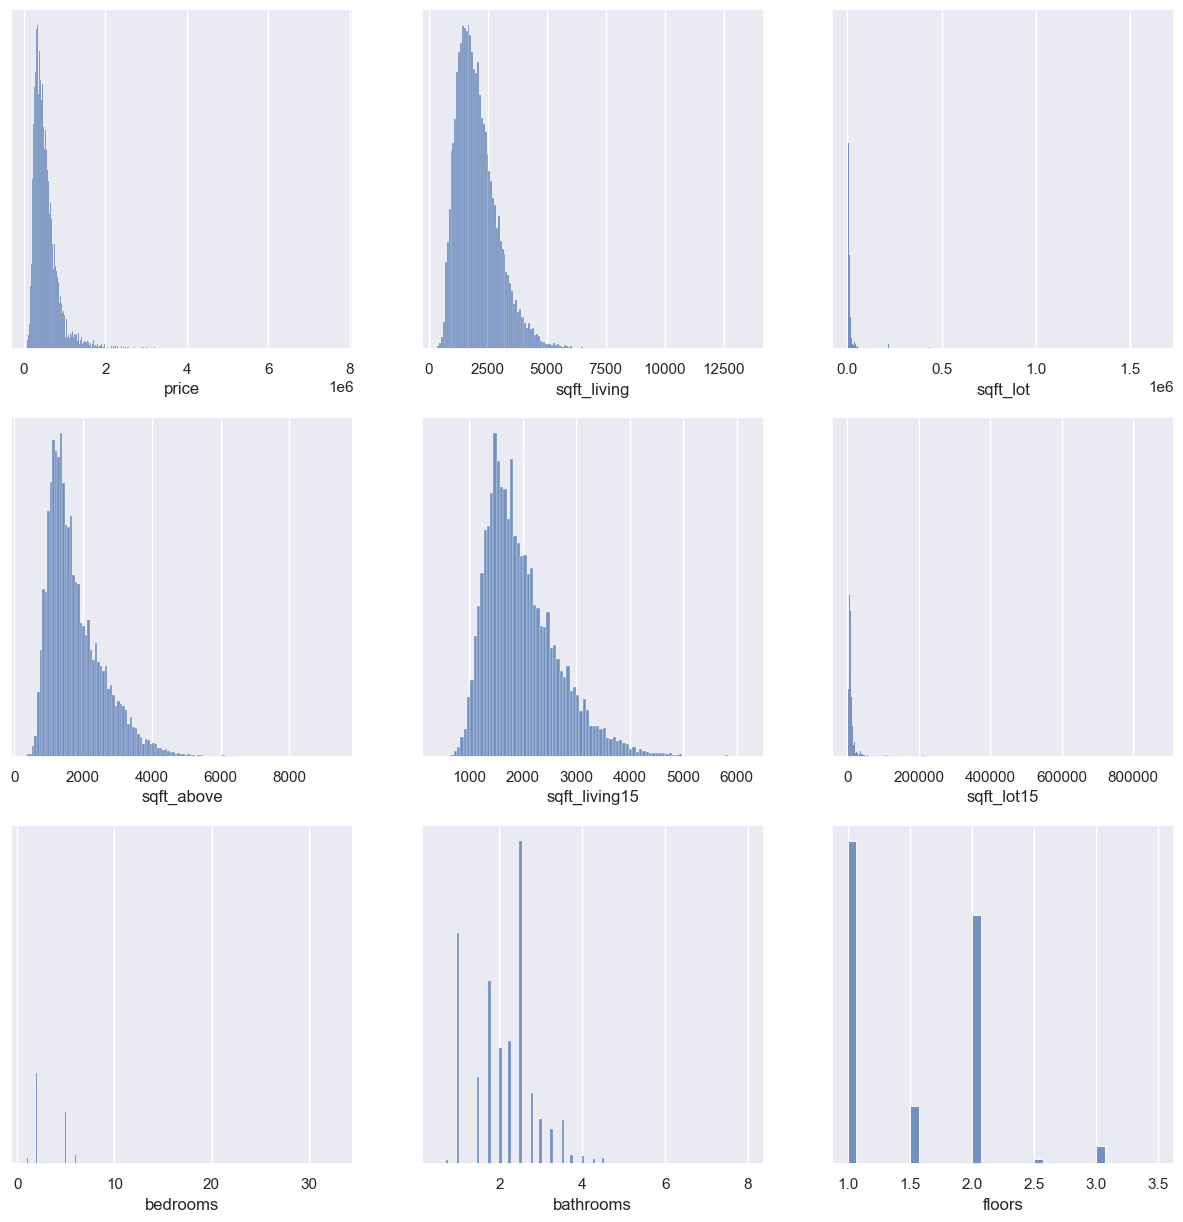

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

axs = [item for sublist in axs for item in sublist]

for idx, cont_col in enumerate(cont_cols+dic_cols):
    sns.histplot(data=df, x=cont_col, ax=axs[idx])
    axs[idx].axes.get_yaxis().set_visible(False) # turning of y axis
    

### Visulizing distribution of categorical features

In [24]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
# list of categorical variables
cat_cols = ['grade', 'view', 'condition']

In [62]:
list(df['condition'].value_counts().index)

['Average', 'Good', 'Very Good', 'Fair', 'Poor']

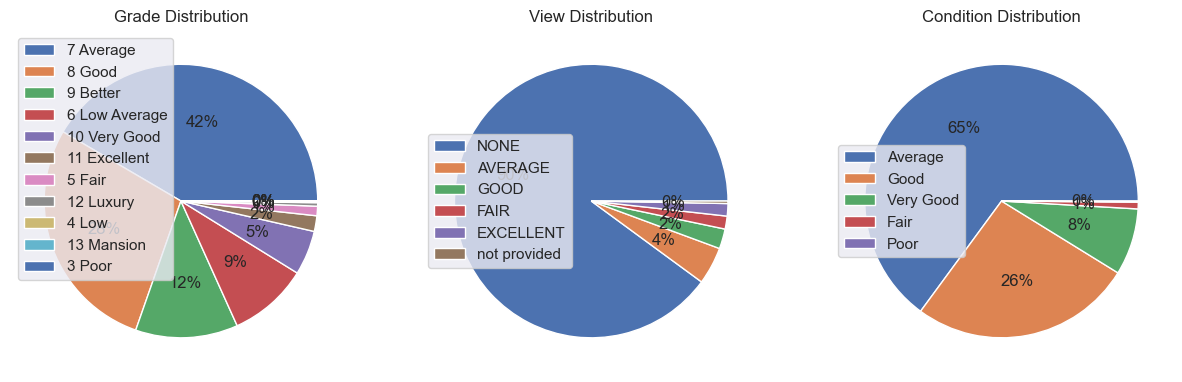

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# axs = [item for sublist in axs for item in sublist]

for idx, cat_col in enumerate(cat_cols):
    # define data
    data = df[cat_col].value_counts().values
    labels = df[cat_col].value_counts().index
    
    # create pie chart
    axs[idx].pie(data, autopct='%.0f%%')
    # set title
    axs[idx].set_title(f"{cat_col.title()} Distribution")
    # create legend
    axs[idx].legend(labels)

## Bivariate analysis
In this section well be looking at how our independent variables are related to the dependent variable (price)
### Findings:
- All numeric variables have a postive correlation with price
- Most correlated are sqft_living, sqft_above, sqrt_living15, and bathrooms
- Bedrooms and floors have a medium positive correlation.
- Those 6 variables will be useful when creating our model.
- Since the p-value is less than 0.05 for all the One-Way Anova tests conducted on the categorical feature, we can reject the null hypothesis. This implies that we have sufficient proff to say that their exists a difference in price amoung the different categories in each categorical variable.

### Numeric variables

In [123]:
corr = df[cont_cols + dic_cols].corr()
corr

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors
price,1.000000,0.701917,0.089876,0.605368,0.585241,0.082845,0.308787,0.525906,0.256804
sqft_living,0.701917,1.000000,0.173453,0.876448,0.756402,0.184342,0.578212,0.755758,0.353953
sqft_lot,0.089876,0.173453,1.000000,0.184139,0.144763,0.718204,0.032471,0.088373,-0.004814
sqft_above,0.605368,0.876448,0.184139,1.000000,0.731767,0.195077,0.479386,0.686668,0.523989
sqft_living15,0.585241,0.756402,0.144763,0.731767,1.000000,0.183515,0.393406,0.569884,0.280102
sqft_lot15,0.082845,0.184342,0.718204,0.195077,0.183515,1.000000,0.030690,0.088303,-0.010722
bedrooms,0.308787,0.578212,0.032471,0.479386,0.393406,0.030690,1.000000,0.514508,0.177944
bathrooms,0.525906,0.755758,0.088373,0.686668,0.569884,0.088303,0.514508,1.000000,0.502582
floors,0.256804,0.353953,-0.004814,0.523989,0.280102,-0.010722,0.177944,0.502582,1.000000


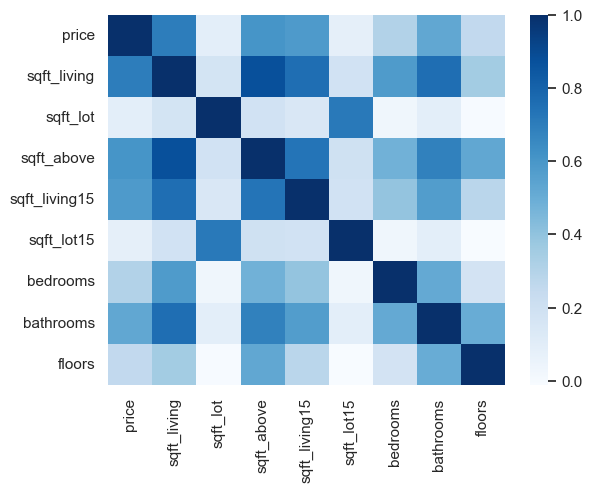

In [124]:
sns.heatmap(corr, cmap='Blues');

#### Continous numeric variables
Here we look at how our continous numeric variables are related to the price

In [90]:
# list of continous variables with a medium to high correlation to 
high_corr_cols = ["sqft_living", "sqft_above", "sqft_living15"]

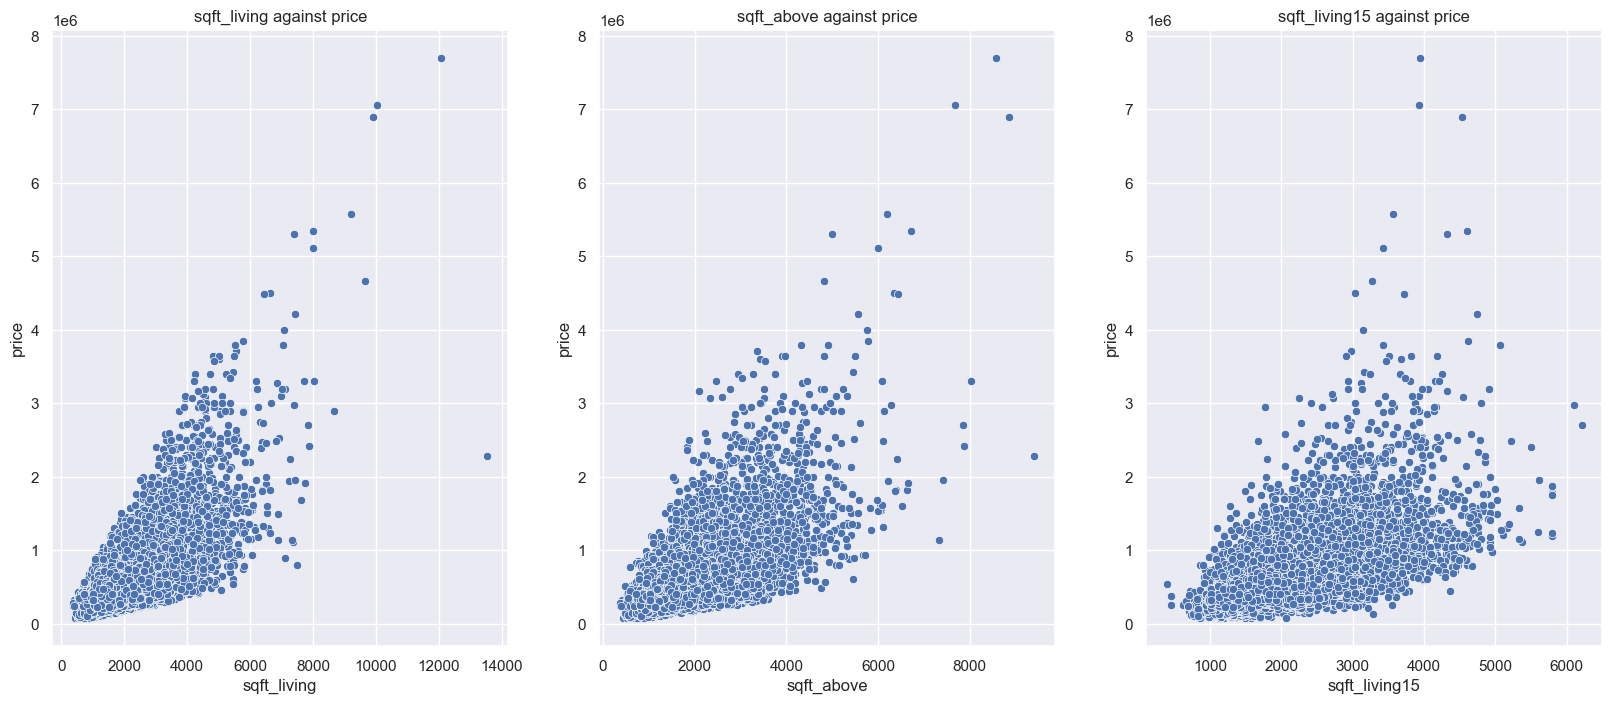

In [95]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))

for idx, _ in enumerate(high_corr_cols):
    sns.scatterplot(x=_, y='price', data=df, ax=axs[idx])
    axs[idx].set_title(f"{_} against price")

### Discrete numeric variables

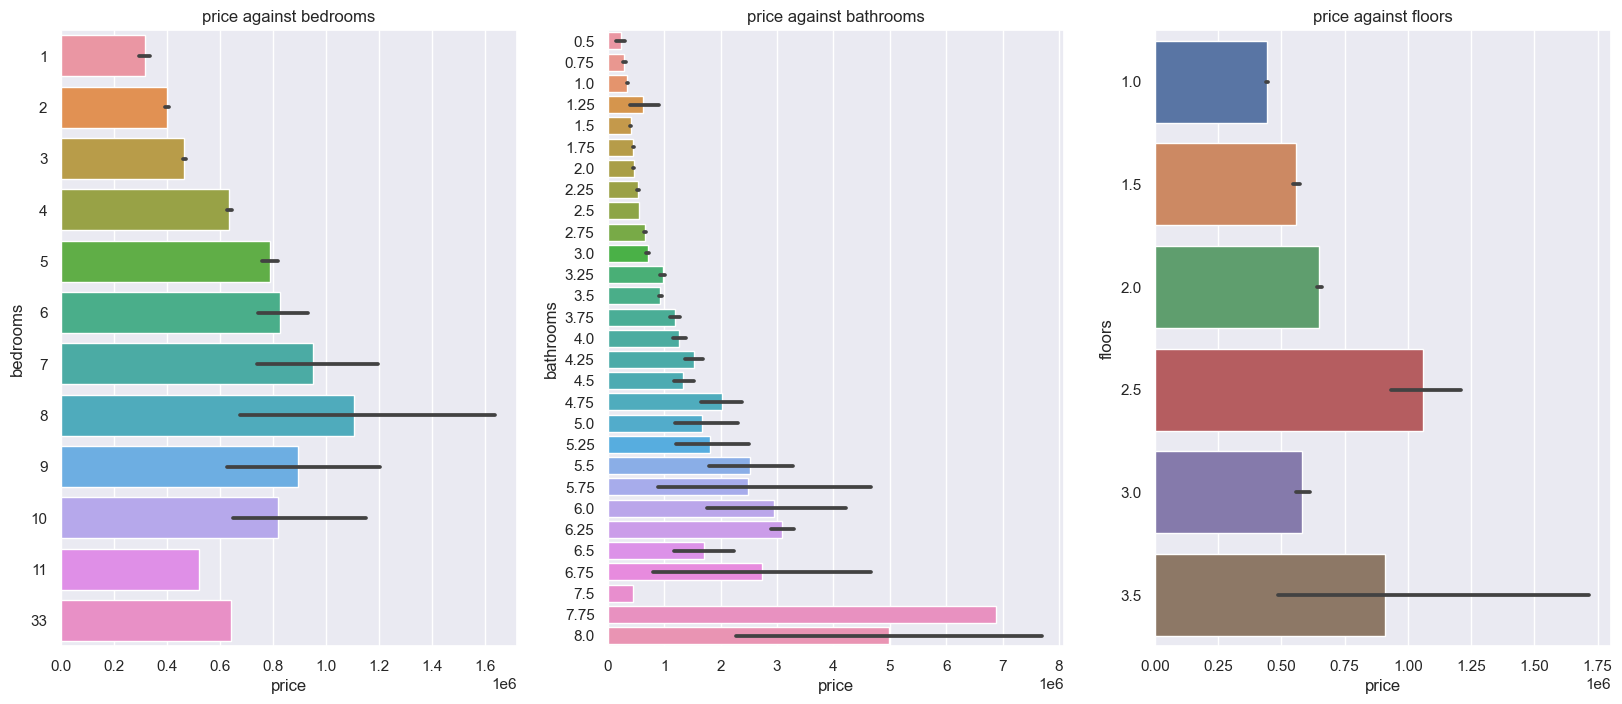

In [155]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))

for idx, _ in enumerate(dic_cols):
    sns.barplot(x="price", y=_, data=df, ax=axs[idx], orient="h")
    axs[idx].set_title(f"price against {_}")

### Categorical variables
We will use column charts to visulize how the mean house price changes by categorical varible.

We'll also perform a 1-way ANOVA to check if the mean house price is different by the categorical variable.

In [143]:
def perform_one_way_anova(dataframe, categorical_column, label_column):
    # Get unique categories from the categorical column
    categories = dataframe[categorical_column].unique()

    # Create a dictionary to store the category and corresponding label values
    category_data = {}

    # Populate the dictionary with category and label values
    for category in categories:
        category_data[category] = dataframe[dataframe[categorical_column] == category][label_column]

    # Perform one-way ANOVA test
    statistic, p_value = f_oneway(*category_data.values())

    # Round the statistic and p-value to 4 decimal places
    statistic = round(statistic, 4)
    p_value = round(p_value, 4)

    # Return the rounded statistic and p-value
    return statistic, p_value

In [149]:
def visualize_mean_by_category(dataframe, categorical_column, label_column, axis):
    # Calculate mean price by the categorical variable
    mean_prices = dataframe.groupby(categorical_column)[label_column].mean()

    # Perform one-way ANOVA test
    statistic, p_value = perform_one_way_anova(dataframe, categorical_column, label_column)

    # Create a bar plot on the specified axis
    mean_prices.plot(kind='bar', ax=axis)
    
    # Set the labels and title
    axis.set_xlabel(categorical_column)
    axis.set_ylabel('Mean ' + label_column.title())
    axis.set_title(f'Mean {label_column.title()} by {categorical_column.title()}')
    
    # Display the statistic and p-value
    axis.text(0.05, 0.95, f'Statistic: {statistic}\np-value: {p_value}',
              transform=axis.transAxes, fontsize=10, verticalalignment='top')


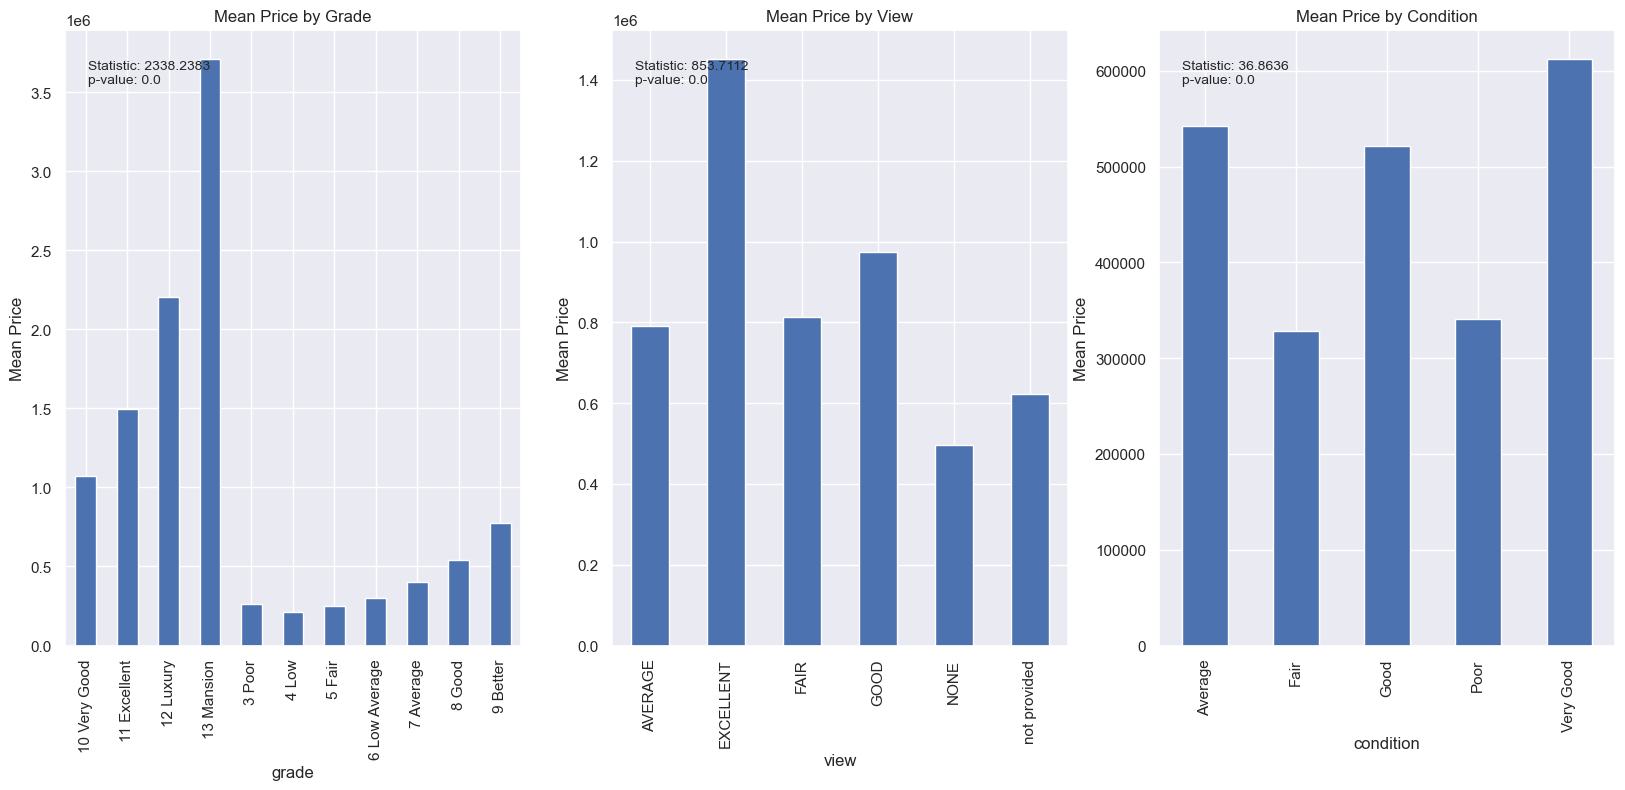

In [150]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))

for idx, _ in enumerate(cat_cols):
    visualize_mean_by_category(df, _, 'price', axs[idx])

# Data Processing

# Modeling

# Regression Results